In [2]:
import numpy as np
import teradata
import pandas as pd
from pandas import Series,DataFrame

import math

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

from sklearn import metrics
import statsmodels.api as sm
from sklearn import preprocessing

/usr/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
from __future__ import (absolute_import, division,
                        print_function, unicode_literals) 

In [43]:
y=df[['bad_2','bad_1','bad_0']]
y_logit=df.bad_flag
y_cato=df.bad_cato
y=df.bad_flag

In [44]:
x=df[['wclaim_all_amt_90d','wcnt_gross_loss_30d','wdisp_all_amt_90d','wtpv_30d','wexposure','wbad_rate']]

In [9]:
from sklearn import covariance
covariance.empirical_covariance(x,assume_centered=False)

array([[ 0.69848156,  0.0904199 ,  0.1034954 , -0.02063972, -0.01018574,
        -0.01793812],
       [ 0.0904199 ,  0.44694589,  0.08132244,  0.01693524,  0.00814747,
         0.00910599],
       [ 0.1034954 ,  0.08132244,  0.48841657, -0.01206844, -0.00251015,
        -0.00661215],
       [-0.02063972,  0.01693524, -0.01206844,  0.17475503,  0.02623207,
         0.00946998],
       [-0.01018574,  0.00814747, -0.00251015,  0.02623207,  0.05725719,
        -0.00105449],
       [-0.01793812,  0.00910599, -0.00661215,  0.00946998, -0.00105449,
         0.08290816]])

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=0)

In [12]:
import mord as m
ordmod= m.OrdinalRidge()
ordmod.fit(x_train,y_train)

OrdinalRidge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
       normalize=False, random_state=None, solver='auto', tol=0.001)

In [13]:
ordmod.coef_

array([[ 0.00205198,  0.00158852, -0.02059823,  0.00478923, -0.00330262,
         0.00334757],
       [ 0.04709476,  0.01535494,  0.02741133,  0.09805322,  0.009432  ,
        -0.03654954],
       [-0.04914674, -0.01694347, -0.00681309, -0.10284244, -0.00612938,
         0.03320197]])

In [14]:
ordmod.intercept_

array([ 0.07977303,  0.11547099,  0.80475598])

In [15]:
ordmod.unique_y_

array([ 0.,  1.])

In [16]:
a=ordmod.predict(x_test)
x_train.shape, x_test.shape

((29516, 6), (12651, 6))

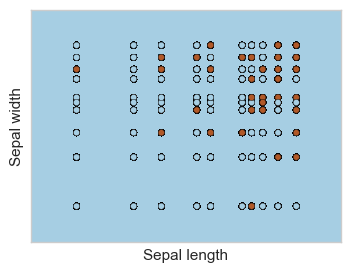

In [30]:
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets

h = .02  # step size in the mesh
x_a=x.iloc[:,0:2]
logreg = linear_model.LogisticRegression(C=1e5)
x_train,x_test,y_train,y_test = train_test_split(x_a,y_logit,test_size=0.3, random_state=0)
# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(x_train, y_train)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x_train.iloc[:, 0].min() - .5, x_train.iloc[:, 0].max() + .5
y_min, y_max = x_train.iloc[:, 1].min() - .5, x_train.iloc[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(x_train.iloc[:, 0], x_train.iloc[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [29]:
x_min, x_max = x_train.iloc[:, 0].min() - .5, x_train.iloc[:, 0].max() + .5

In [47]:
yy.ravel().shape,x_train.shape

((27873,), (29516, 6))

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=0)

for multi_class in ('multinomial', 'ovr'):
    clf = LogisticRegression(solver='sag', max_iter=100, random_state=42,
                             multi_class=multi_class).fit(x_train, y_train)

    # print the training scores
    print("training score : %.3f (%s)" % (clf.score(x_train, y_train), multi_class))

ValueError: bad input shape (29516, 3)

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y_cato,test_size=0.3, random_state=0)

for multi_class in ('ovr', 'multinomial'):
    clf_multi_class = LogisticRegression(solver='sag', max_iter=100, random_state=42,
                             multi_class=multi_class).fit(x_train, y_train)

    # print the training scores
    print("training score : %.3f (%s)" % (clf_multi_class.score(x_train, y_train), multi_class))
    print("testing score : %.3f (%s)" % (clf_multi_class.score(x_test, y_test), multi_class))

training score : 0.771 (ovr)
testing score : 0.771 (ovr)
training score : 0.771 (multinomial)
testing score : 0.771 (multinomial)


In [19]:
import mord as m
ordmod= m.OrdinalRidge()
olg=ordmod.fit(x_train,y_train)
print("training score : %.3f (%s) " % (olg.score(x_train, y_train), 'ordinal'))
print("testing score : %.3f (%s)" % (olg.score(x_test, y_test),'ordinal'))

training score : -0.457 (ordinal) 
testing score : -0.448 (ordinal)


In [20]:
clf_multi_class.coef_

array([[-0.15114792, -0.05987168,  0.03454121, -0.35500705, -0.00477452,
         0.10781512],
       [ 0.21123913,  0.07450333,  0.21122606,  0.51383976,  0.04544677,
        -0.21788622],
       [-0.06009121, -0.01463164, -0.24576727, -0.15883271, -0.04067225,
         0.11007111]])

In [21]:
clf_multi_class.fit

<bound method LogisticRegression.fit of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=42, solver='sag',
          tol=0.0001, verbose=0, warm_start=False)>

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y_logit,test_size=0.3, random_state=0)
clf_logit = LogisticRegression(solver='sag', max_iter=100, random_state=42).fit(x_train, y_train)
# print the training scores
print("training score : %.3f (%s)" % (clf_logit.score(x_train, y_train),'logit'))
print("testing score : %.3f (%s)" % (clf_logit.score(x_test, y_test), 'logit'))

training score : 0.771 (logit)
testing score : 0.771 (logit)


In [37]:
clf_multi_class.coef_

array([[-0.15114792, -0.05987168,  0.03454121, -0.35500705, -0.00477452,
         0.10781512],
       [ 0.21123913,  0.07450333,  0.21122606,  0.51383976,  0.04544677,
        -0.21788622],
       [-0.06009121, -0.01463164, -0.24576727, -0.15883271, -0.04067225,
         0.11007111]])

In [24]:
clf_logit.coef_

array([[ 0.27534756,  0.10302324,  0.03600809,  0.62553291,  0.02760395,
        -0.20251047]])

Automatically created module for IPython interactive environment


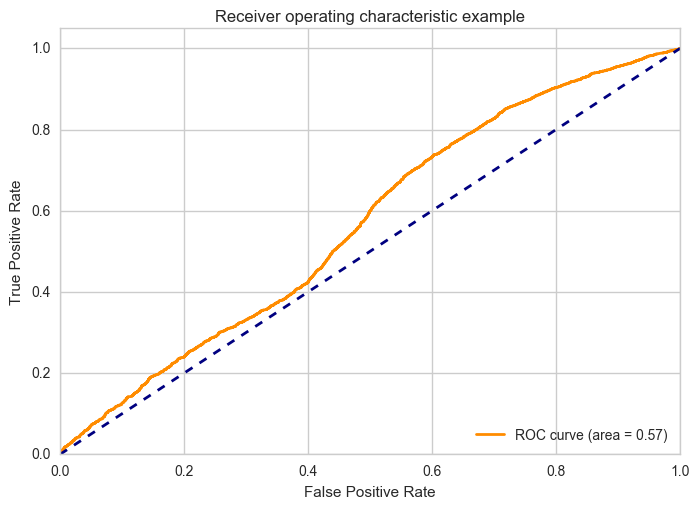

In [33]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

n_classes = y.shape[1]
random_state = np.random.RandomState(0)

# shuffle and split training and test sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(x_train, y_train).decision_function(x_test)



# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test.iloc[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.as_matrix().ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

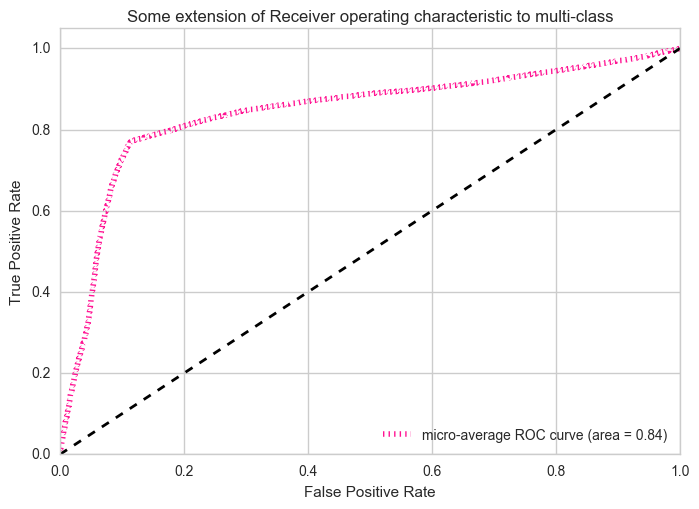

In [34]:
# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)
'''
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
'''
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [39]:
#train on 0-2
x_train,x_test,y_train,y_test = train_test_split(x,y_logit,test_size=0.3, random_state=0)
clf_logit = LogisticRegression(solver='sag', max_iter=100, random_state=42).fit(x_train, y_train)
# print the training scores
print("training score : %.3f (%s)" % (clf_logit.score(x_train, y_train),'logit'))
print("testing score : %.3f (%s)" % (clf_logit.score(x_test, y_test), 'logit'))


training score : 0.771 (logit)
testing score : 0.771 (logit)


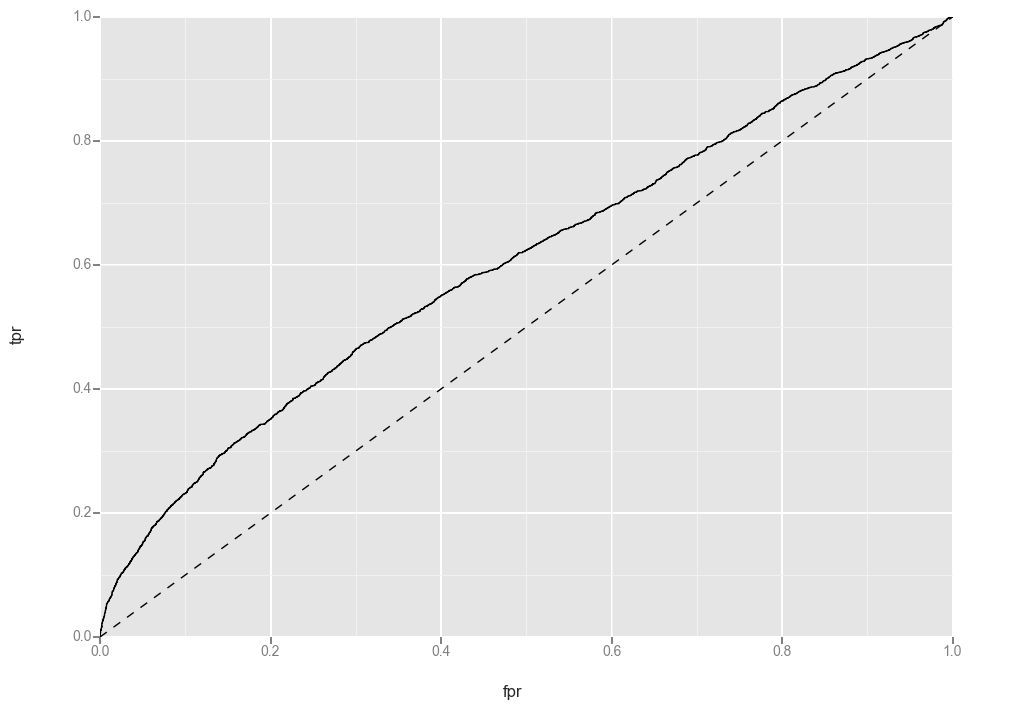

<ggplot: (293324405)>

In [94]:
from sklearn import metrics
import pandas as pd
from ggplot import *

preds = clf_logit.predict_proba(x_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

In [1]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# Binarize the output
n_classes = y.shape[0]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = x.shape
x = np.c_[x, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
x_train,x_test,y_train,y_test = train_test_split(x,y_logit,test_size=0.3, random_state=0)
clf_logit = LogisticRegression(solver='sag', max_iter=100, random_state=42).fit(x_train, y_train)

y_score = classifier.fit(x_train, y_train).predict_proba(x_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

#plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Automatically created module for IPython interactive environment


NameError: name 'y' is not defined

In [13]:
y1=df.bad_flag1
y2=df.bad_flag2

In [14]:
x=df[['wclaim_all_amt_90d','wcnt_gross_loss_30d','wdisp_all_amt_90d','wtpv_30d','wexposure','wbad_rate']]

training score : 0.771 (logit)
testing score : 0.771 (logit)


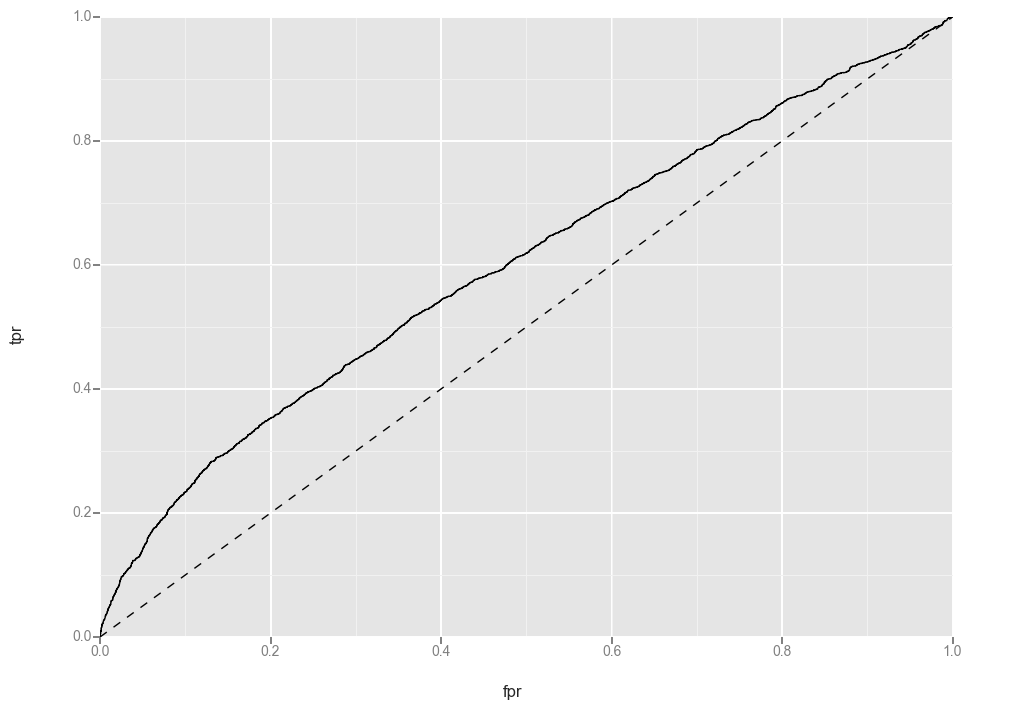

<ggplot: (288001737)>

In [17]:
#train on 0-2
x_train,x_test,y_train,y_test = train_test_split(x,y1,test_size=0.3, random_state=0)
clf_logit1 = LogisticRegression(solver='sag', max_iter=100, random_state=42).fit(x_train, y_train)
# print the training scores
print("training score : %.3f (%s)" % (clf_logit.score(x_train, y_train),'logit'))
print("testing score : %.3f (%s)" % (clf_logit.score(x_test, y_test), 'logit'))
from sklearn import metrics
import pandas as pd
from ggplot import *

preds = clf_logit1.predict_proba(x_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

In [21]:
clf_logit1.coef_, clf_logit1.intercept_

(array([[ 0.26634768,  0.1128435 ,  0.03543748,  0.67846807, -0.00998797,
         -0.21109534]]), array([-1.4504225]))

training score : 0.924 (logit)
testing score : 0.927 (logit)


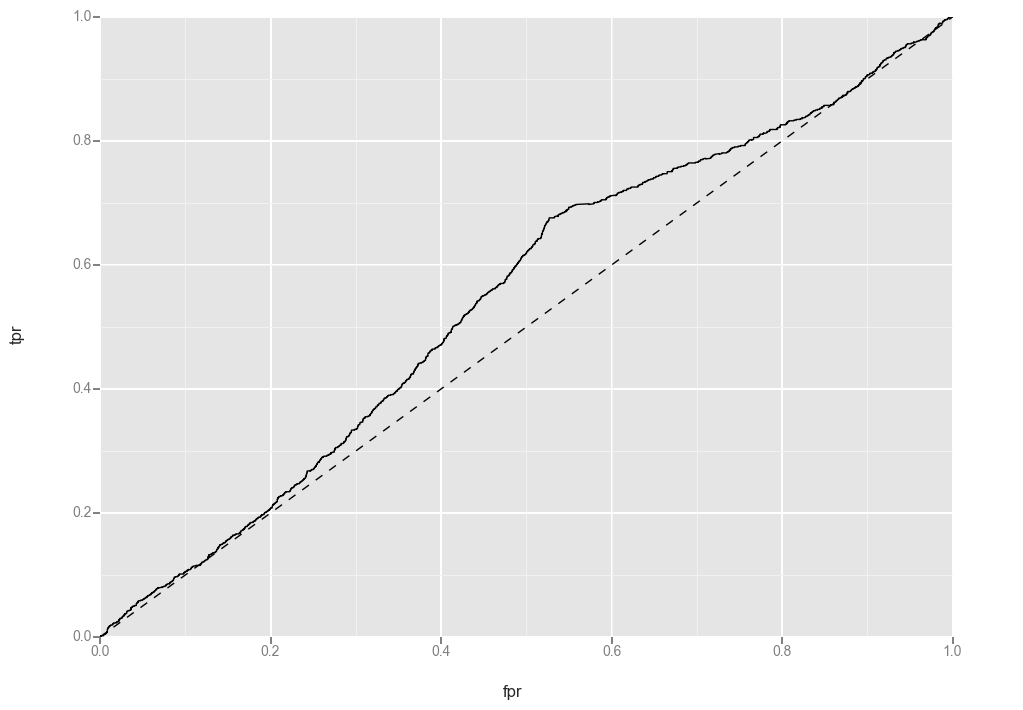

<ggplot: (284882481)>

In [18]:
#train on 0-2
x_train,x_test,y_train,y_test = train_test_split(x,y2,test_size=0.3, random_state=0)
clf_logit2 = LogisticRegression(solver='sag', max_iter=100, random_state=42).fit(x_train, y_train)
# print the training scores
print("training score : %.3f (%s)" % (clf_logit.score(x_train, y_train),'logit'))
print("testing score : %.3f (%s)" % (clf_logit.score(x_test, y_test), 'logit'))
from sklearn import metrics
import pandas as pd
from ggplot import *

preds = clf_logit2.predict_proba(x_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

In [1]:
clf_logit2.coef_, clf_logit2.intercept_, clf_logit2.fit

NameError: name 'clf_logit2' is not defined

In [5]:
x2=df[['wagent_riskfound_rate_2','wtpv_90d_2','wach_wd_amt_90d_2','wwd_all_cnt_90d_2','wach_tpv_amt_90d_2','wwd_all_amt_90d_2','wclaim_all_amt_7d_2']]

In [7]:
y2=df.bad_flag2

training score : 0.964 (logit)
testing score : 0.964 (logit)


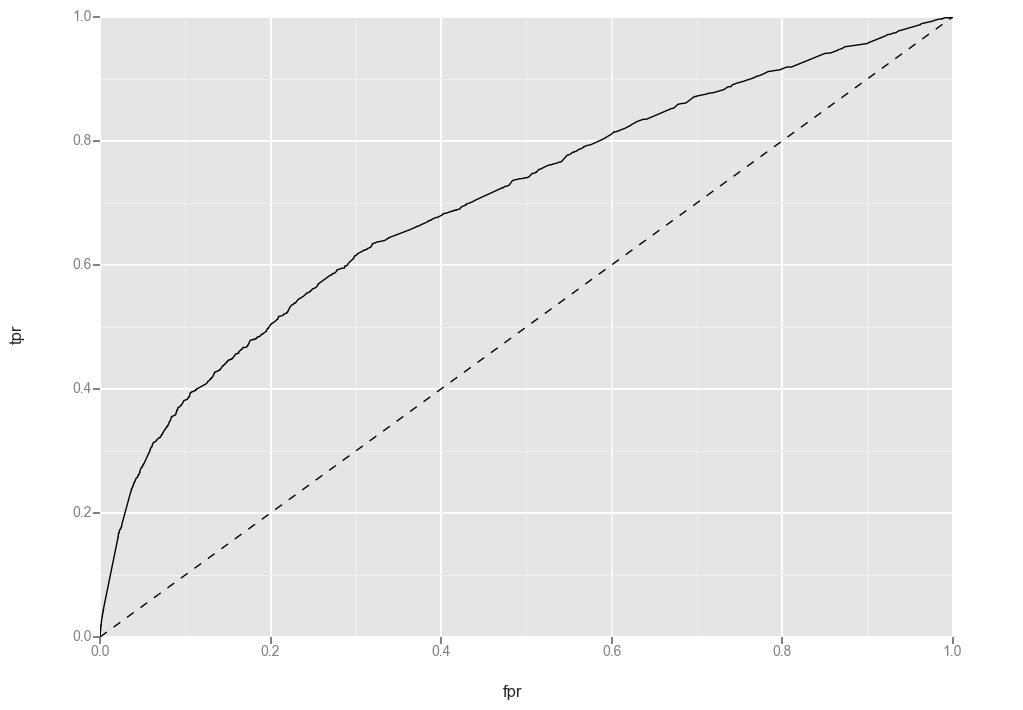

<ggplot: (436399933)>

In [9]:
#train on 0-2
x_train,x_test,y_train,y_test = train_test_split(x2,y2,test_size=0.3, random_state=0)
clf_logit1 = LogisticRegression(solver='sag', max_iter=100, random_state=42).fit(x_train, y_train)
# print the training scores
print("training score : %.3f (%s)" % (clf_logit1.score(x_train, y_train),'logit'))
print("testing score : %.3f (%s)" % (clf_logit1.score(x_test, y_test), 'logit'))
from sklearn import metrics
import pandas as pd
from ggplot import *

preds = clf_logit1.predict_proba(x_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

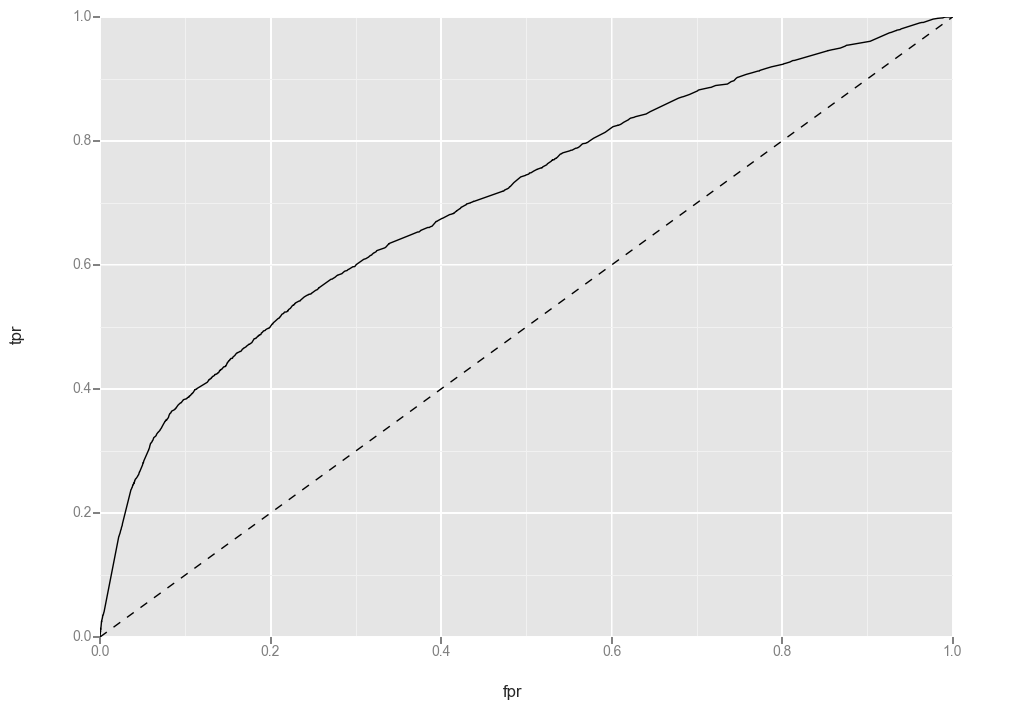

<ggplot: (347530733)>

In [12]:
preds = clf_logit1.predict_proba(x_train)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_train, preds)

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

In [10]:
clf_logit1.coef_

array([[ 0.75091765,  0.5713904 ,  0.59038718,  0.22592205,  0.23451255,
        -0.35801192,  1.22670987]])

In [11]:
clf_logit1.intercept_

array([-3.27576637])